In [19]:
import pyvista as pv
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import os

# ✅ Set your actual STL folder path here
mesh_folder = "Desktop/Dragonfly sesh/mito-mesh"
results = []

for filename in os.listdir(mesh_folder):
    if filename.endswith(".stl"):
        mesh_path = os.path.join(mesh_folder, filename)
        mesh = pv.read(mesh_path)
        points = mesh.points

        if points.shape[0] < 3:
            continue  # Skip degenerate or empty meshes

        pca = PCA(n_components=3)
        pca.fit(points)
        orientation_vector = pca.components_[0]
        centroid = points.mean(axis=0)

        results.append({
            "Mesh_File": filename,
            "CenterX": centroid[0],
            "CenterY": centroid[1],
            "CenterZ": centroid[2],
            "VecX": orientation_vector[0],
            "VecY": orientation_vector[1],
            "VecZ": orientation_vector[2]
        })

# Save results
df = pd.DataFrame(results)
df.to_csv("Desktop/Dragonfly sesh/Mitochondria_PCA_Orientation.csv", index=False)
print(f"✅ Exported orientation data for {len(df)} mitochondria.")


✅ Exported orientation data for 20 mitochondria.


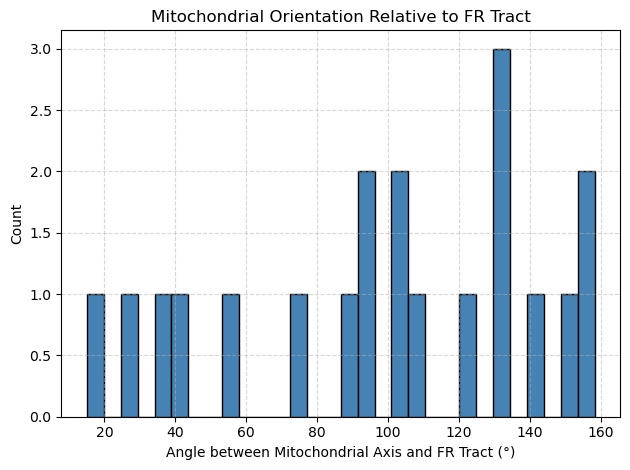

In [23]:
import pandas as pd
import numpy as np

# Load your mitochondria PCA orientation CSV
df = pd.read_csv("Desktop/Dragonfly sesh/Mitochondria_PCA_Orientation.csv")

# Define your fasciculus retroflexus tract axis (from PCA)
tract_axis = np.array([-0.8207, 0.5589, 0.1186])  # Replace with actual values
tract_axis = tract_axis / np.linalg.norm(tract_axis)  # Normalize

def compute_angle(vec, axis):
    vec = vec / np.linalg.norm(vec)
    dot = np.dot(vec, axis)
    return np.degrees(np.arccos(np.clip(dot, -1.0, 1.0)))

df['Relative_Angle_to_FR'] = df[['VecX', 'VecY', 'VecZ']].apply(
    lambda row: compute_angle(np.array([row['VecX'], row['VecY'], row['VecZ']]), tract_axis),
    axis=1
)

df.to_csv("Desktop/Dragonfly sesh/Mitochondria_With_FR_Angles.csv", index=False)

import matplotlib.pyplot as plt
plt.hist(df['Relative_Angle_to_FR'], bins=30, color='steelblue', edgecolor='k')
plt.xlabel("Angle between Mitochondrial Axis and FR Tract (°)")
plt.ylabel("Count")
plt.title("Mitochondrial Orientation Relative to FR Tract")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()